In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Months to parse/display
months_names = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep']

# Anything less than 50 kr. is ignored
lower_bounds = 50

In [8]:
def read_csv(month):
    df = pd.read_csv(
        month + '.csv',
        usecols=['ResourceGroupName', 'ResourceName', 'ResourceType', 'Cost'],
        index_col=['ResourceGroupName', 'ResourceName', 'ResourceType']
    )
    df = df[df['Cost']  > lower_bounds]
    
    return df.round({'Cost': 0})\
             .rename(columns={'Cost': month})

def add_sum_col(data):
    data['TOTAL'] = data[months_names].sum(axis=1)
    return data.sort_values('TOTAL', ascending=False)

def add_sum_row(data):
    data.loc["TOTAL"] = data.sum(numeric_only=True)
    return data.fillna('')

def print_graph(data, index, title):
    f = plt.figure()
    plt.title(title, color='black')

    data.set_index(index)\
        .drop(['TOTAL'], axis=1)\
        .T\
        .plot.area(ax=f.gca())
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

def print_table(data):
    return data.style.format(precision=0, thousands='.')

In [9]:
df_cost = pd.concat(map(read_csv, months_names), axis=1)\
            .reset_index()\
            .sort_values(by=['ResourceGroupName', 'ResourceName'])\
            .fillna(0)

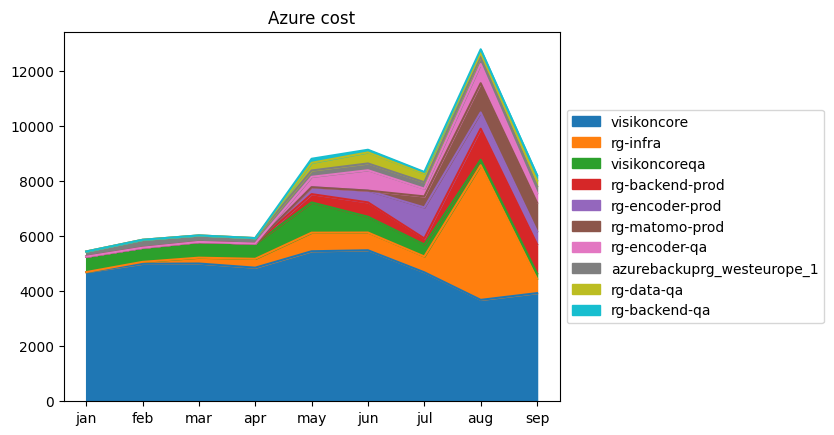

In [10]:
df = add_sum_col(
    df_cost.groupby('ResourceGroupName')[months_names]\
           .sum()\
           .reset_index()
)

print_graph(df, 'ResourceGroupName', 'Azure cost')

In [11]:
print_table(
    add_sum_row(
        df[~df['ResourceGroupName'].str.startswith('rg-')]\
                                   .set_index('ResourceGroupName')
    )
)

,jan,feb,mar,apr,may,jun,jul,aug,sep,TOTAL
ResourceGroupName,,,,,,,,,,
visikoncore,4.698,5.001,5.010,4.859,5.456,5.492,4.691,3.688,3.933,42.828
visikoncoreqa,561,516,573,555,1.100,575,436,197,193,4.706
azurebackuprg_westeurope_1,188,287,236,199,231,247,235,272,257,2.152
TOTAL,5.447,5.804,5.819,5.613,6.787,6.314,5.362,4.157,4.383,49.686


In [12]:
print_table(
    add_sum_row(
        df[df['ResourceGroupName'].str.startswith('rg-')]\
                                  .set_index('ResourceGroupName')
    )
)

,jan,feb,mar,apr,may,jun,jul,aug,sep,TOTAL
ResourceGroupName,,,,,,,,,,
rg-infra,0,69,213,322,676,645,575,4.900,522,7.922
rg-backend-prod,0,0,0,0,302,522,220,1.128,1.061,3.233
rg-encoder-prod,0,0,0,0,251,428,1.128,592,470,2.869
rg-matomo-prod,0,0,0,0,0,0,401,1.063,1.041,2.505
rg-encoder-qa,0,0,0,0,378,741,281,698,345,2.443
rg-data-qa,0,0,0,0,279,402,321,134,208,1.344
rg-backend-qa,0,0,0,0,147,96,52,130,193,618
TOTAL,0,69,213,322,2.033,2.834,2.978,8.645,3.840,20.934


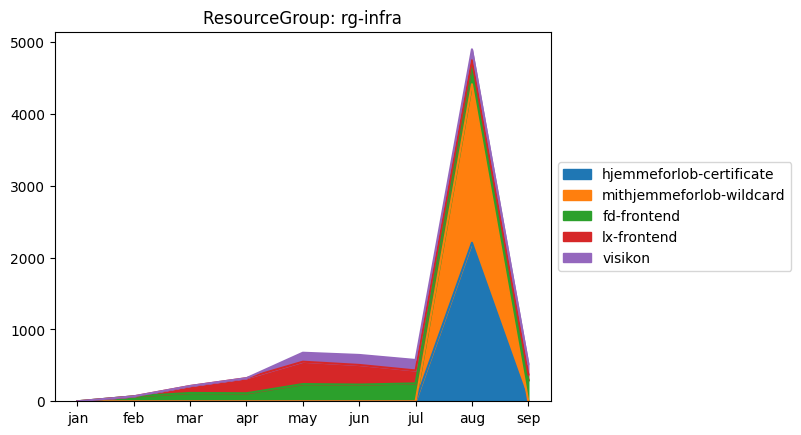

,jan,feb,mar,apr,may,jun,jul,aug,sep,TOTAL
ResourceName,,,,,,,,,,
hjemmeforlob-certificate,0,0,0,0,0,0,0,2.207,0,2.207
mithjemmeforlob-wildcard,0,0,0,0,0,0,0,2.207,0,2.207
fd-frontend,0,69,116,112,240,233,249,273,290,1.582
lx-frontend,0,0,97,210,311,273,180,61,83,1.215
visikon,0,0,0,0,125,139,146,152,149,711
TOTAL,0,69,213,322,676,645,575,4.900,522,7.922


In [13]:
df_infra = add_sum_col(
    df_cost[df_cost['ResourceGroupName']  == 'rg-infra'].drop(['ResourceGroupName', 'ResourceType'], axis=1)
)

print_graph(df_infra, 'ResourceName', 'ResourceGroup: rg-infra')

print_table(
    add_sum_row(
        df_infra.set_index('ResourceName')
    )
)

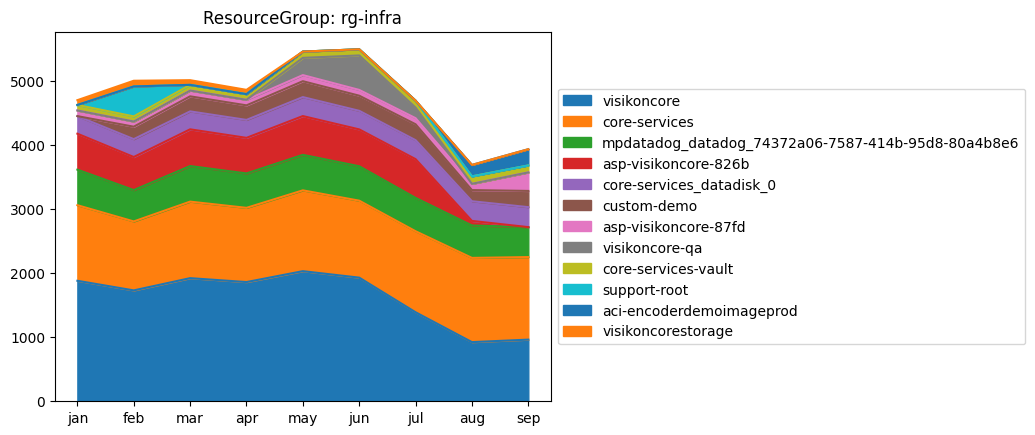

,jan,feb,mar,apr,may,jun,jul,aug,sep,TOTAL
ResourceName,,,,,,,,,,
visikoncore,1.880,1.730,1.921,1.860,2.030,1.929,1.389,923,962,14.624
core-services,1.179,1.076,1.194,1.158,1.261,1.201,1.264,1.314,1.288,10.935
Datadog,555,489,555,537,554,537,520,506,467,4.720
asp-visikoncore-826b,561,516,573,555,605,575,605,71,0,4.061
core-services_datadisk_0,274,279,280,280,296,290,296,307,312,2.614
custom-demo,0,194,235,227,248,236,248,174,253,1.815
asp-visikoncore-87fd,88,81,90,87,95,90,95,98,289,1.013
visikoncore-qa,0,0,0,0,269,538,165,0,0,972
core-services-vault,86,80,89,88,98,96,109,116,109,871


In [14]:
df_core = add_sum_col(
    df_cost[df_cost['ResourceGroupName']  == 'visikoncore'].drop(['ResourceGroupName', 'ResourceType'], axis=1)
)

print_graph(df_core, 'ResourceName', 'ResourceGroup: rg-infra')

print_table(
    add_sum_row(
        df_core.replace('mpdatadog_datadog_74372a06-7587-414b-95d8-80a4b8e6', 'Datadog')\
               .set_index('ResourceName'))
)